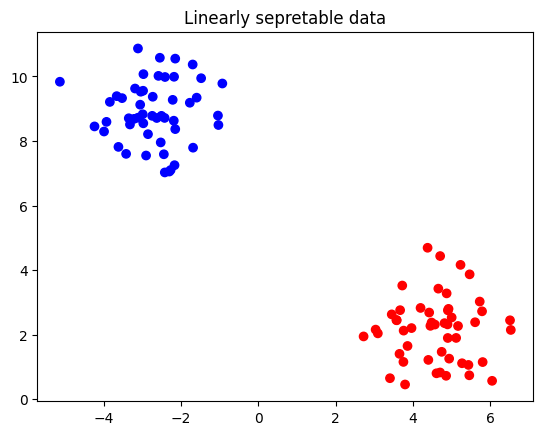

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=100,centers=2,random_state=42, cluster_std=1.0)
y=np.where(y==0,-1,1)
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plt.title("Linearly sepretable data")
plt.show()


In [5]:
from sklearn.svm import SVC
svm_hard=SVC(kernel='linear',C=1e6)
svm_hard.fit(X,y)
print("Number of support vectors",len(svm_hard.support_vectors_))

Number of support vectors 2


In [6]:
w=svm_hard.coef_[0]
b=svm_hard.intercept_[0]
print("w",w)
print("b",b)


w [ 0.24748994 -0.17407192]
b 0.7341550476191021


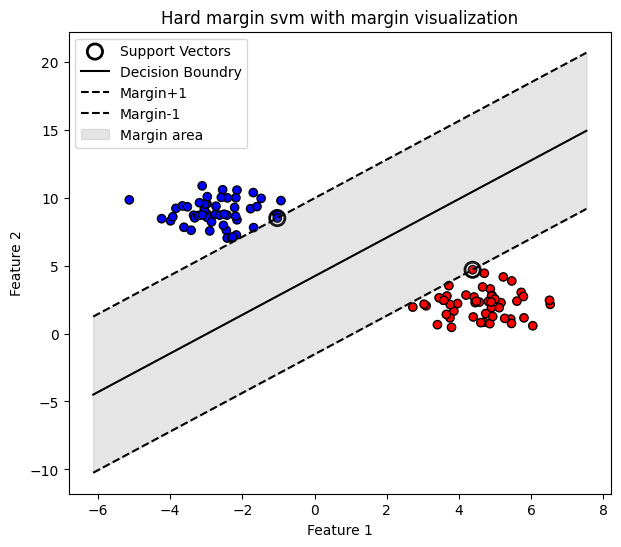

In [8]:
plt.figure(figsize=(7,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',edgecolors='k')
plt.scatter(svm_hard.support_vectors_[:,0],
            svm_hard.support_vectors_[:,1],
            s=120,facecolors="none",edgecolors="k",linewidths=2,
            label="Support Vectors")
x_vals=np.linspace(X[:,0].min()-1,X[:,0].max()+1,200)
y_decision=-(w[0]*x_vals+b)/w[1]
#margin boundaries:W.x+b=+-1
y_margin_pos=-(w[0]*x_vals+b-1)/w[1]
y_margin_neg=-(w[0]*x_vals+b+1)/w[1]
#plot lines
plt.plot(x_vals,y_decision,'k-',label="Decision Boundry")
plt.plot(x_vals,y_margin_pos,'k--',label="Margin+1")
plt.plot(x_vals,y_margin_neg,'k--',label="Margin-1")

#shade margin area
plt.fill_between(x_vals,y_margin_neg,y_margin_pos,color='grey',alpha=0.2,label="Margin area")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Hard margin svm with margin visualization")
plt.legend()
plt.show()




In [ ]:
## part3 Generate Overlapping data

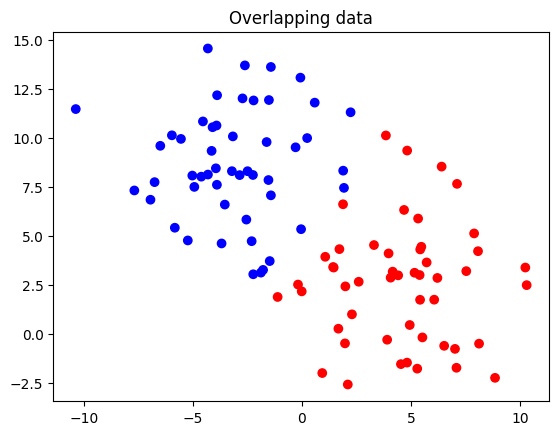

In [13]:
X_overlap,y_overlap=make_blobs(n_samples=100,centers=2,random_state=42,cluster_std=3)
y_overlap=np.where(y_overlap==0,-1,1)
plt.scatter(X_overlap[:,0],X_overlap[:,1],c=y,cmap='bwr')
plt.title("Overlapping data")
plt.show()



In [ ]:
from sklearn.svm import SVC
#Hard margin SVM (Very large c)
svm_hard=SVC(kernel='linear',C=1e6)
svm_hard.fit(X_overlap,y_overlap)
print("Number of support vectors",len(svm_hard.support_vectors_))

Number of support vectors 3


In [ ]:
w=svm_hard.coef_[0] #weight bias

b=svm_hard.intercept_[0] #Bias
print("w",w)
print("b",b)


w [ 6.42872096 -3.87151047]
b 15.50812556660477


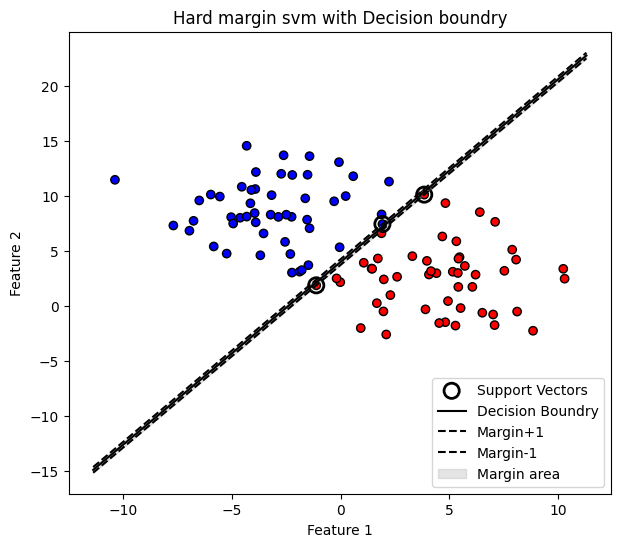

In [17]:

plt.figure(figsize=(7,6))
plt.scatter(X_overlap[:,0],X_overlap[:,1],c=y,cmap='bwr',edgecolors='k')
plt.scatter(svm_hard.support_vectors_[:,0],
            svm_hard.support_vectors_[:,1],
            s=120,facecolors="none",edgecolors="k",linewidths=2,
            label="Support Vectors")
x_vals=np.linspace(X_overlap[:,0].min()-1,X_overlap[:,0].max()+1,200)
y_decision=-(w[0]*x_vals+b)/w[1]
#margin boundaries:W.x+b=+-1
y_margin_pos=-(w[0]*x_vals+b-1)/w[1]
y_margin_neg=-(w[0]*x_vals+b+1)/w[1]
#plot lines
plt.plot(x_vals,y_decision,'k-',label="Decision Boundry")
plt.plot(x_vals,y_margin_pos,'k--',label="Margin+1")
plt.plot(x_vals,y_margin_neg,'k--',label="Margin-1")

#shade margin area
plt.fill_between(x_vals,y_margin_neg,y_margin_pos,color='grey',alpha=0.2,label="Margin area")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Hard margin svm with Decision boundry")
plt.legend()
plt.show()




In [ ]:
#plot soft margin boundry

In [18]:
from sklearn.svm import SVC
svm_soft=SVC(kernel='linear',C=1.0)
svm_soft.fit(X_overlap,y_overlap)
print("NUmber of support vectors:",len(svm_soft.support_vectors_))

NUmber of support vectors: 6


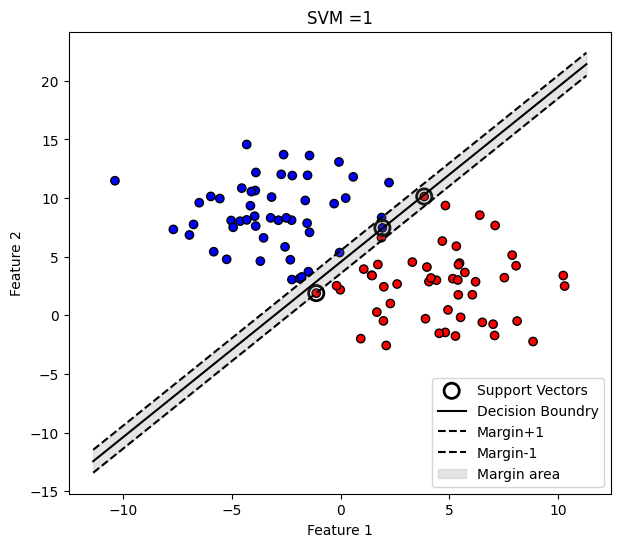

In [24]:
w_soft=svm_soft.coef_[0]
b_soft=svm_soft.intercept_[0]
plt.figure(figsize=(7,6))
plt.scatter(X_overlap[:,0],X_overlap[:,1],c=y,cmap='bwr',edgecolors='k')

plt.scatter(svm_hard.support_vectors_[:,0],
            svm_hard.support_vectors_[:,1],
            s=120,facecolors="none",edgecolors="k",linewidths=2,
            label="Support Vectors")
x_vals=np.linspace(X_overlap[:,0].min()-1,X_overlap[:,0].max()+1,200)
y_decision=-(w_soft[0]*x_vals+b_soft)/w_soft[1]
#margin boundaries:W.x+b=+-1
y_margin_pos=-(w_soft[0]*x_vals+b_soft-1)/w_soft[1]
y_margin_neg=-(w_soft[0]*x_vals+b_soft+1)/w_soft[1]
#plot lines
plt.plot(x_vals,y_decision,'k-',label="Decision Boundry")
plt.plot(x_vals,y_margin_pos,'k--',label="Margin+1")
plt.plot(x_vals,y_margin_neg,'k--',label="Margin-1")

#shade margin area
plt.fill_between(x_vals,y_margin_neg,y_margin_pos,color='grey',alpha=0.2,label="Margin area")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM =1")
plt.legend()
plt.show()


